In [115]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 28 01:22:26 2020

@author: xinxing
"""

#Features without image features:


import matplotlib.pyplot as plt

from sklearn import svm
from scipy import interp
import numpy as np
import pandas as pd
from itertools import cycle

from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import xgboost
import shap
from xgboost import XGBClassifier

#from imblearn.combine import SMOTEENN
#from imblearn.over_sampling import SMOTE 



#original data
#data=pd.read_csv('/Users/xinxing/Documents/XIN/Work/DrLin/ADNI/NewData/combined_norm_features_final.csv',encoding='mac_greek').fillna(0)

#corviate balancing data
data=pd.read_csv('/Users/xinxing/Desktop/MDD/New data/MDD_test/MDD_data_clf.csv').fillna(0)


#data=data.drop("Status", axis=1)
#data=data[data.Status==0]



df=data

#df_MCI=pd.concat([df_LMCI, df_EMCI])
#df['DX'].value_counts()

#Try the original:

y=df.Status
X=df.drop(['Age','7T ID', 'XNAT','Status', 'Gender'],axis=1)


#top 20
X=X[["LGsuperiorparietal","LGentorhinal","Rpostcentral", "RGpostcentral","LGcaudalanteriorcingulate",
     "RGinferiorparietal", "N_Right-Thalamus-Proper", "Linferiorparietal", "N_Right-Inf-Lat-Vent","RGpericalcarine", 
      "Lprecentral", "Rsuperiorfrontal", "Linsula", "Rcuneus","RGsuperiorparietal",
      "LGfusiform", "LGprecentral", "LGpostcentral", "Rparacentral","LGsuperiortemporal"
      ]]
'''
#top 15
X=X[["LGsuperiorparietal","LGentorhinal","Rpostcentral", "RGpostcentral","LGcaudalanteriorcingulate",
     "RGinferiorparietal", "N_Right-Thalamus-Proper", "Linferiorparietal", "N_Right-Inf-Lat-Vent","RGpericalcarine", 
      "Lprecentral", "Rsuperiorfrontal", "Linsula", "Rcuneus","LGfusiform", 
      ]]

#top 10
X=X[["LGsuperiorparietal","LGentorhinal","Rpostcentral", "RGpostcentral","LGcaudalanteriorcingulate",
     "RGinferiorparietal", "N_Right-Thalamus-Proper", "Linferiorparietal", "Rsuperiorfrontal","RGpericalcarine"  
      ]]
'''
#b=np.mean(importance, axis=0)
#feature_importances = pd.DataFrame(b,index = X_1.columns, columns=['importance']).sort_values('importance',ascending=False)



numFeature=X.shape[1]
#X=X.as_matrix()
y=y.ravel()
X_1=X

'''
#normalized standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
'''

res=[]
f1_res=[]
from sklearn.model_selection import train_test_split
# load JS visualization code to notebook
shap.initjs()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

# train XGBoost model
'''
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)
params = {
                'learning_rate': 0.01,
                'n_estimators':300
        }  

model = XGBClassifier(**params)
model.fit(X_train, y_train)
'''
model = RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=8, max_features='auto',max_depth=50)
model.fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap_values = np.array(shap_values)

    
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
    
    
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1:%.2f%%" % (f1 * 100.0))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[1], shap_values[1,0,:], X_train.iloc[0,:])


Accuracy: 64.71%
f1:70.00%


In [116]:
# visualize the training st predictions
shap.force_plot(explainer.expected_value[1], shap_values[1,:,:], X_train)

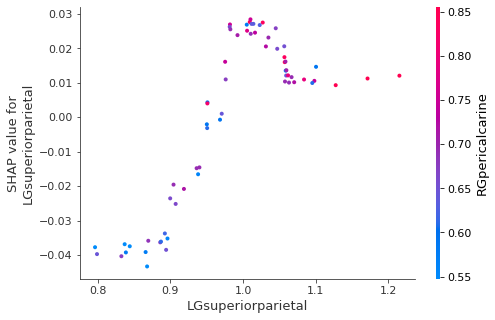

In [117]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("LGsuperiorparietal", shap_values[1,:,:], X_train)

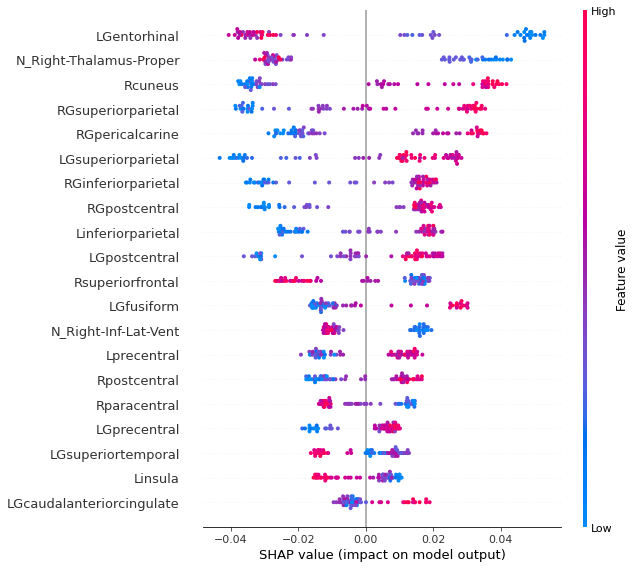

In [118]:
# summarize the effects of all the features
shap.summary_plot(shap_values[1,:,:], X_train)

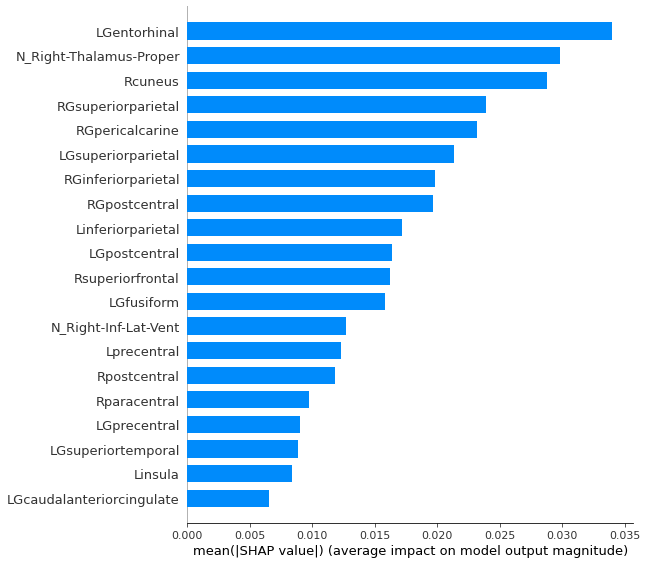

In [119]:
shap.summary_plot(shap_values[1,:,:], X_train, plot_type="bar")

In [47]:
shap_values.shape

(66, 10)